<a href="https://colab.research.google.com/github/Hlamulo1/Research-on-ensemble-methods/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features


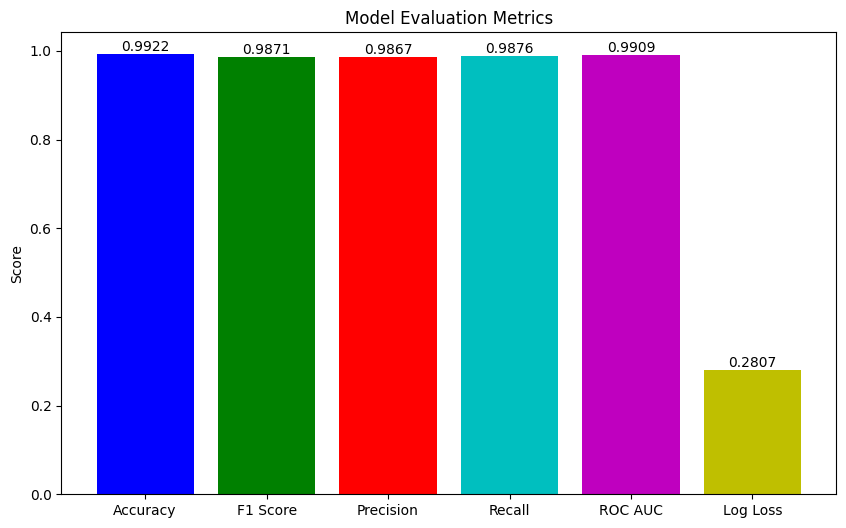

Confusion Matrix:
[[19139   111]
 [  104  8256]]


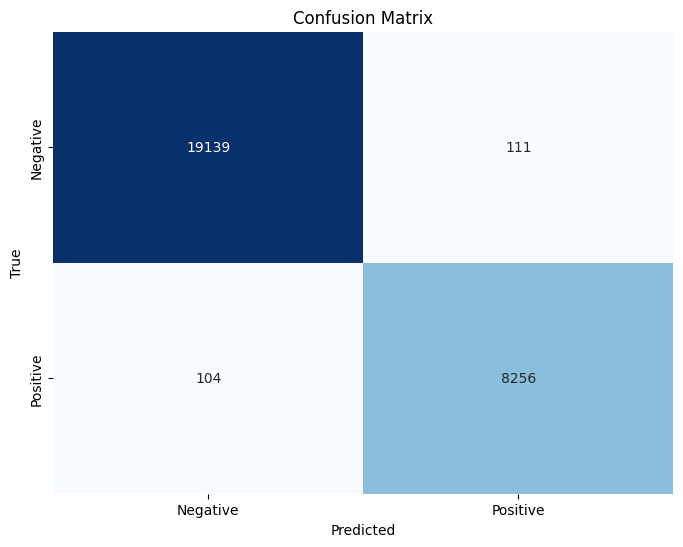

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import (f1_score, accuracy_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score, log_loss)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier as the base estimator
base_classifier = DecisionTreeClassifier(random_state=0)

# Fit the DecisionTreeClassifier on the training data
base_classifier.fit(X_train, y_train)

# Predictions on the test data
prediction = base_classifier.predict(X_test)

# Calculate additional metrics
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, prediction)

# Create a bar graph with different colors for the metrics
metrics_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
metrics_values = [accuracy, f1, precision, recall, roc_auc, logloss]

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add actual values on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4),
             ha='center', va='bottom')

plt.show()

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
